In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [113]:
X = data.drop("Salary", axis=1)
y = data.Salary

In [114]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [115]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

<h4>Linear Regression</h4>
Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [117]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

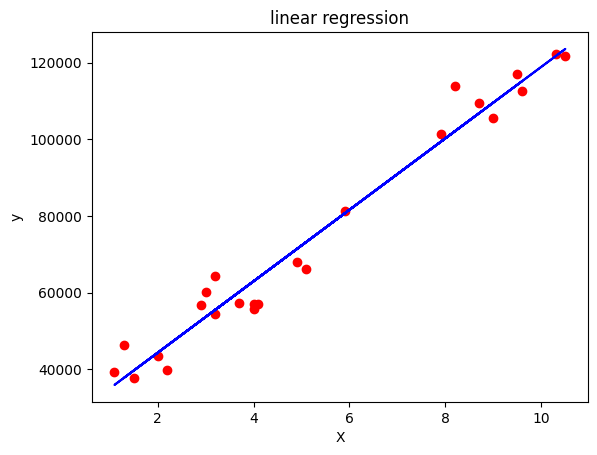

In [118]:
plt.title("linear regression")
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

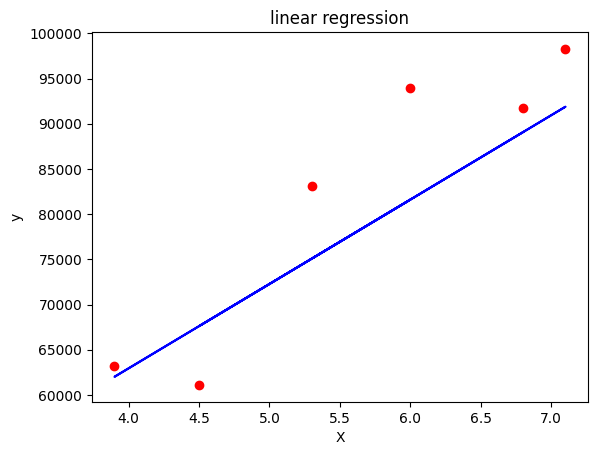

In [119]:
plt.title("linear regression")
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.show

<h4>Multiple Linear Regression</h4>
A multiple regression considers the effect of more than one explanatory variable on some outcome of interest. also same as linear regression
we can write code.

In [193]:
data2 = pd.read_csv("50_Startups.csv")
data2.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [261]:
X = data2.iloc[:, :-1]
y = data2.iloc[:, -1]

In [262]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [263]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [264]:
from sklearn.preprocessing import OneHotEncoder
OH_encdoer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
tmp = pd.DataFrame(OH_encdoer.fit_transform(X[["State"]]))
tmp.index = X.index
X = pd.concat([X.iloc[:, : -1], tmp], axis=1)
X["New York"] = X[2]
X["California"] = X[0]
X["Florida"] = X[1]
X = X.drop([0, 1, 2], axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
0,165349.20,136897.80,471784.10,1.0,0.0,0.0
1,162597.70,151377.59,443898.53,0.0,1.0,0.0
2,153441.51,101145.55,407934.54,0.0,0.0,1.0
3,144372.41,118671.85,383199.62,1.0,0.0,0.0
4,142107.34,91391.77,366168.42,0.0,0.0,1.0


In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [266]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,New York,California,Florida
33,55493.95,103057.49,214634.81,0.0,0.0,1.0
35,46014.02,85047.44,205517.64,1.0,0.0,0.0
26,75328.87,144135.98,134050.07,0.0,0.0,1.0
34,46426.07,157693.92,210797.67,0.0,1.0,0.0
18,91749.16,114175.79,294919.57,0.0,0.0,1.0


In [267]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

In [269]:
y_test = pd.DataFrame(y_test)
y_pred= pd.DataFrame(y_pred, columns=["Predict"]).Predict.apply(lambda x: round(x, 2))
y_pred.index = y_test.index
result = pd.concat([y_test, y_pred], axis=1)
result

,Profit,Predict
28,103282.38,103015.20
11,144259.40,132582.28
10,146121.95,132447.74
41,77798.83,71976.10
2,191050.39,178537.48
27,105008.31,116161.24
38,81229.06,67851.69
31,97483.56,98791.73
22,110352.25,113969.44
4,166187.94,167921.07


<h3>Polynomial Regression</h3>

In [292]:
data3 = pd.read_csv("Position_Salaries.csv")
data3.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [303]:
# we just get columns level and Salary 
# also after use that to make a polynomail regression we use the Position column with another method
X = data3.iloc[:, 1: -1]
y = data3.iloc[:, -1]

In [304]:
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [305]:
y.head()

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [306]:
#simple way to make linear regression
model3 = LinearRegression()
model3.fit(X, y)

LinearRegression()

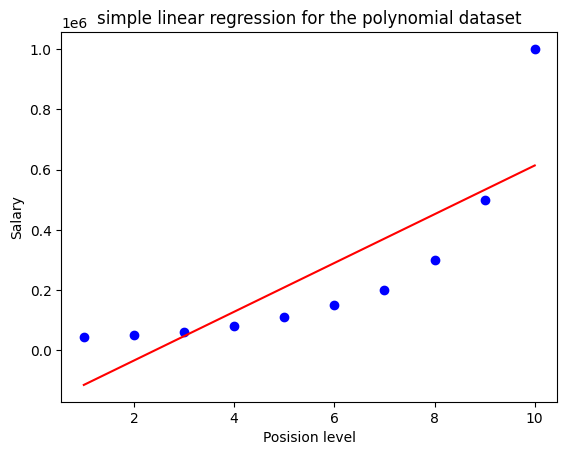

In [307]:
plt.title("simple linear regression for the polynomial dataset")
plt.scatter(X, y, color='blue')
plt.plot(X, model3.predict(X), color='red')
plt.xlabel('Posision level')
plt.ylabel('Salary')
plt.show()

In [308]:
#Training the Polynomial regression on the dataset
from sklearn.preprocessing import PolynomialFeatures
ply_feature = PolynomialFeatures(degree=4)
ply_X = ply_feature.fit_transform(X)
ply_model3 = LinearRegression()
ply_model3.fit(ply_X, y)

LinearRegression()

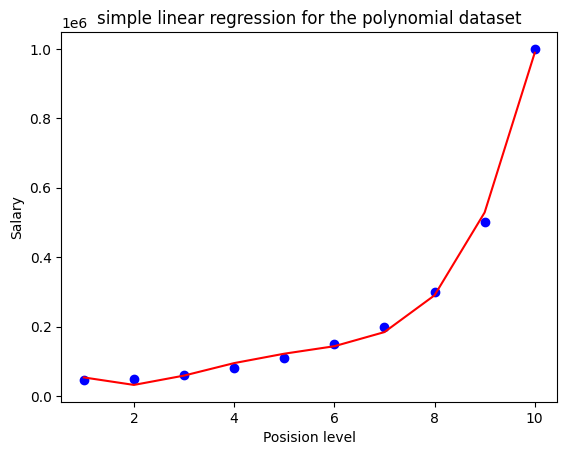

In [309]:
plt.title("simple linear regression for the polynomial dataset")
plt.scatter(X, y, color='blue')
plt.plot(X, ply_model3.predict(ply_X), color='red')
plt.xlabel('Posision level')
plt.ylabel('Salary')
plt.show()

/var/folders/jx/q29k_1dn659bzyf86v6kns800000gn/T/ipykernel_16636/2096173912.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X.values), max(X.values), 0.1)


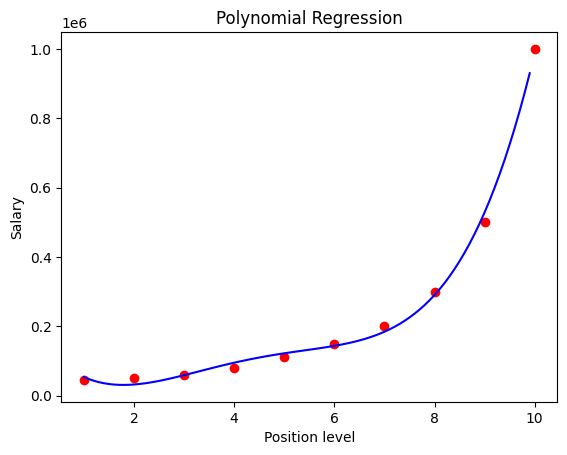

In [312]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X.values), max(X.values), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, ply_model3.predict(ply_feature.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()